## Luther Kaggle Data

I am working on this data concurrently with troubleshooting my webscraping code.  I will either use this data to enrich the data I pulled or as a substitute whilst still waiting for the code to finsh running.

The first section below will be involving only the main ted data.  I will be making the assumption that the view maturity of a video will be a year after its release.  I will store all data that has not been published for more than a year in its own df, and webscrape the current views to be used as a test set for my model.  Log the view count.

In [3]:
import pandas as pd
import numpy as np
import math
import re
import time
from datetime import *
import dateutil.parser
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400

In [4]:
data = pd.read_csv('ted_main.csv')


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [6]:
data.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
def CleanCols(df):
    df.drop('url', axis=1, inplace = True)
    df.drop('description', axis=1, inplace = True)
    df.drop('name', axis=1, inplace = True)
    data['published_date'] = data['published_date'].apply(lambda x: datetime.fromtimestamp(x).date())
    data['film_date'] = data['film_date'].apply(lambda x: datetime.fromtimestamp(x).date())
    data['days_online'] = data['published_date'].apply(lambda x: ((dateutil.parser.parse('9/22/2017').date()-x)))
    data['days_online'] = (data['days_online']/np.timedelta64(1, 'D')).astype(int)
    data['duration'] = round(data['duration']/60,2)
    data['views_pd'] = round(data['views']/data['days_online'])
    data['log_views'] = data['views'].apply(lambda x: math.log(x))
    data['languages'] = data['languages'].replace(0,1)
    return df

In [8]:
#Removing unnecessary columns
CleanCols(data)


,comments,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views,days_online,views_pd,log_views
0,4553,19.40,TED2006,2006-02-24,60,Ken Robinson,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,47227110,4106,1.150200e+04,17.670479
1,265,16.28,TED2006,2006-02-24,43,Al Gore,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,3200520,4106,7.790000e+02,14.978824
2,124,21.43,TED2006,2006-02-23,26,David Pogue,1,2006-06-26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,1636292,4106,3.990000e+02,14.307943
3,200,18.60,TED2006,2006-02-25,35,Majora Carter,1,2006-06-26,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,1697550,4106,4.130000e+02,14.344697
4,593,19.83,TED2006,2006-02-21,48,Hans Rosling,1,2006-06-27,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,12005869,4105,2.925000e+03,16.300906
5,672,21.75,TED2006,2006-02-01,36,Tony Robbins,1,2006-06-27,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,20685401,4105,5.039000e+03,16.844939
6,919,16.53,TED2006,2006-02-23,31,Julia Sweeney,1,2006-07-09,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,3769987,4093,9.210000e+02,15.142582
7,46,19.97,TED2006,2006-02-22,19,Joshua Prince-Ramus,1,2006-07-09,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,967741,4093,2.360000e+02,13.782720
8,852,24.75,TED2006,2006-02-01,32,Dan Dennett,1,2006-07-17,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,2567958,4085,6.290000e+02,14.758622
9,900,21.03,TED2006,2006-02-24,31,Rick Warren,1,2006-07-17,"[{'id': 21, 'name': 'Unconvincing', 'count': 8...","[{'id': 94, 'hero': 'https://pe.tedcdn.com/ima...","Pastor, author","['Christianity', 'God', 'culture', 'happiness'...",A life of purpose,3095993,4085,7.580000e+02,14.945619


In [9]:
a_max = data.views.max()
a_min = data.views.min()
data['views_norm'] = data['views'].apply(lambda x: ((x-a_min)/(a_max-a_min)))

In [10]:
test_df = data[data['days_online'] < 364]
test_df

,comments,duration,event,film_date,languages,main_speaker,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,views,days_online,views_pd,log_views,views_norm
2288,66,14.70,TEDNYC,2016-09-06,21,J.D. Vance,1,2016-09-26,"[{'id': 1, 'name': 'Beautiful', 'count': 96}, ...","[{'id': 2328, 'hero': 'https://pe.tedcdn.com/i...",Author,"['TEDNYC', 'United States', 'capitalism', 'chi...",America's forgotten working class,1077686,361,2.985000e+03,13.890327,0.021774
2289,23,4.60,TED Studio,2016-05-31,33,Camille A. Brown,1,2016-09-27,"[{'id': 1, 'name': 'Beautiful', 'count': 430},...","[{'id': 652, 'hero': 'https://pe.tedcdn.com/im...",Choreographer and educator,"['Africa', 'Slavery', 'TED Fellows', 'art', 'c...",A visual history of social dance in 25 moves,778810,360,2.163000e+03,13.565522,0.015439
2290,20,13.35,TED@BCG Paris,2016-05-17,21,Oded Shoseyov,1,2016-09-28,"[{'id': 8, 'name': 'Informative', 'count': 410...","[{'id': 2558, 'hero': 'https://pe.tedcdn.com/i...",Nanobiotechnologist,"['DNA', 'animals', 'biodiversity', 'biology', ...",How we're harnessing nature's hidden superpowers,1211098,359,3.374000e+03,14.007038,0.024602
2291,490,14.45,TEDSummit,2016-06-25,27,Sam Harris,1,2016-09-29,"[{'id': 8, 'name': 'Informative', 'count': 813...","[{'id': 2243, 'hero': 'https://pe.tedcdn.com/i...","Neuroscientist, philosopher","['AI', 'brain', 'choice', 'future', 'history',...",Can we build AI without losing control over it?,2592561,358,7.242000e+03,14.768157,0.053885
2292,36,19.08,TEDSummit,2016-06-26,25,Helen Fisher,1,2016-09-30,"[{'id': 25, 'name': 'OK', 'count': 124}, {'id'...","[{'id': 2330, 'hero': 'https://pe.tedcdn.com/i...","Anthropologist, expert on love","['Internet', 'anthropology', 'communication', ...",Technology hasn't changed love. Here's why,1593458,357,4.463000e+03,14.281417,0.032707
2293,39,9.88,TEDSummit,2016-06-26,28,Ellen Jorgensen,1,2016-10-03,"[{'id': 8, 'name': 'Informative', 'count': 426...","[{'id': 2354, 'hero': 'https://pe.tedcdn.com/i...","Biologist, community science advocate","['CRISPR', 'DNA', 'biology', 'biomechanics', '...",What you need to know about CRISPR,1400803,354,3.957000e+03,14.152556,0.028623
2294,72,12.70,TEDNYC,2016-09-06,22,Sayu Bhojwani,1,2016-10-04,"[{'id': 3, 'name': 'Courageous', 'count': 144}...","[{'id': 2543, 'hero': 'https://pe.tedcdn.com/i...",Immigration scholar,"['TEDNYC', 'United States', 'community', 'demo...",Immigrant voices make democracy stronger,783649,353,2.220000e+03,13.571716,0.015542
2295,56,12.70,TEDxStanford,2016-04-23,23,Adam de la Zerda,1,2016-10-05,"[{'id': 8, 'name': 'Informative', 'count': 251...","[{'id': 1939, 'hero': 'https://pe.tedcdn.com/i...","Biologist, electrical engineer","['TEDx', 'brain', 'cancer', 'chemistry', 'heal...",We can start winning the war against cancer,985203,352,2.799000e+03,13.800603,0.019814
2296,109,11.77,TEDSummit,2016-06-25,33,Isaac Lidsky,1,2016-10-06,"[{'id': 10, 'name': 'Inspiring', 'count': 3442...","[{'id': 1951, 'hero': 'https://pe.tedcdn.com/i...","Author, entrepreneur","['Blindness', 'brain', 'choice', 'fear', 'huma...",What reality are you creating for yourself?,2561564,351,7.298000e+03,14.756129,0.053228
2297,13,4.48,TED Studio,2016-05-01,33,Rainn Wilson,1,2016-10-07,"[{'id': 7, 'name': 'Funny', 'count': 374}, {'i...","[{'id': 1685, 'hero': 'https://pe.tedcdn.com/i...","Actor, writer","['adventure', 'curiosity', 'entertainment', 'e...",Ideas worth dating,792297,350,2.264000e+03,13.582692,0.015725


In [11]:
data = data[data['days_online'] >= 365]

## Preliminary Plots 

Making some preliminary plots to get a better idea of what the data shows and to help decide what factors will be incorporated in the linear regression.  I will need to find a way to normalize the time component so we are comparing apples to apples. Proportions based on dates?  Cut off videos that have not been out for more than a year (since data was taken), then webscrape current views.  Take views, then get a rate by dividing the number of days it has been out.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


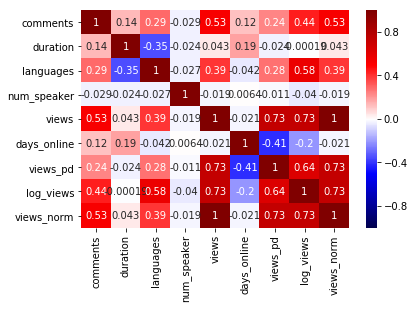

In [13]:
plt.savefig("test.png", format="png")
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap=('seismic'), annot = True)

In [14]:
play_df = data[(data['views_pd']<=15000) & (data['duration']<float(40))]

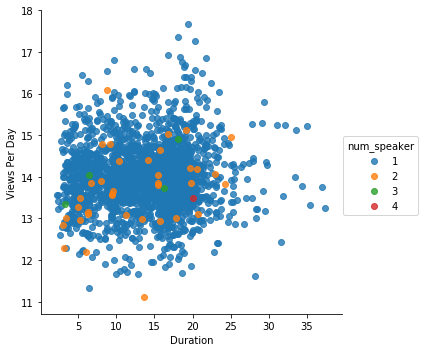

In [15]:
fig = sns.lmplot(y="log_views", x="duration", data=play_df, hue = 'num_speaker', fit_reg = False)
fig = fig.set_axis_labels('Duration', 'Views Per Day')

In [16]:
four_highest = data[data.views>21000000].ratings.index
four_highest

Int64Index([0, 201, 452, 677, 837, 1346, 1776], dtype='int64')

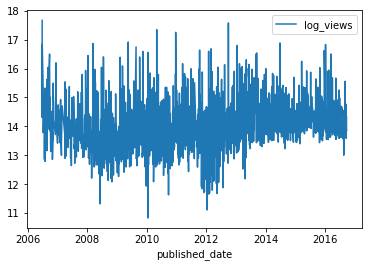

In [17]:
data[['published_date','log_views']].set_index('published_date').plot()

In [18]:
#data[['comments','views']].set_index('published_date').plot()

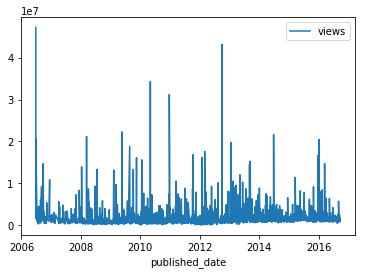

In [19]:
data[['published_date','views']].set_index('published_date').plot()

Text(0,0.5,'Views Normalized')

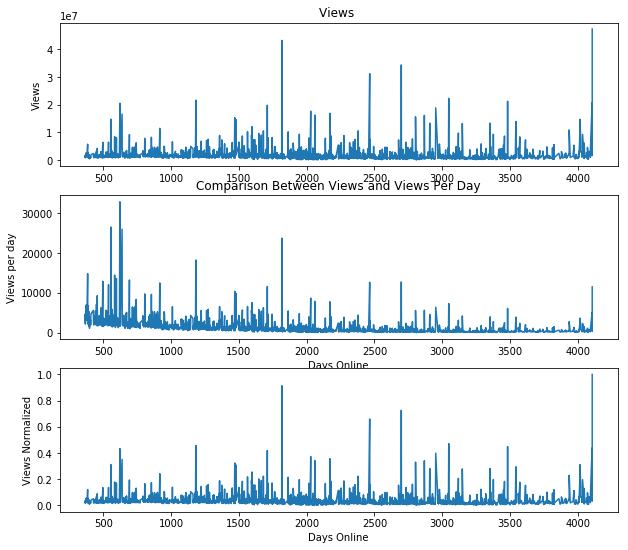

In [20]:
fig, ax = plt.subplots(3, 1, figsize=(10, 9))  # 2 Rows, 1 Col

ax[0].plot(data['days_online'],data['views'])
ax[0].set_title('Views ')
ax[0].set_ylabel('Views')

ax[1].plot(data['days_online'], data['views_pd'])
ax[1].set_xlabel('Days Online')
ax[1].set_ylabel('Views per day')
ax[1].set_title('Comparison Between Views and Views Per Day');

ax[2].plot(data['days_online'], data['views_norm'])
ax[2].set_xlabel('Days Online')
ax[2].set_ylabel('Views Normalized')


## Pulling out reactions

Each video has its own ratings, or reactions the watchers have during or after the video.  Maybe change the ratings to proportions. 

In [21]:
#Pulls the number of tags for a certain tag
def FindTag(tag, sl):
    hand = False
    count = 0
    for i in sl:
        if tag in i:
            hand = True
        elif hand == True:
            count = int(i.split('}')[0].strip())
            hand= False
    return count

In [22]:
# calling in each tag individually to run through the broken comment.  I am doing this so its easier to 
# join the dataframes later (and match the number to the correct column)
def CrackShell(string):
    tag_list=['Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', \
          'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious']
    comment = string.split(':')
    emotes = []
    #I am searching by tag name because it will be easier to store and import to df later
    for i in tag_list:
        emotes.append(FindTag(i, comment))
    return emotes

In [23]:
emote_dict = {}
tag_list=['Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', \
          'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious']
for i in range(len(data.ratings)):
        emote_dict[i] = CrackShell(data.ratings[i])

In [24]:
tag_list=['Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', 'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious']

In [25]:
from pandas import DataFrame
emote_df = pd.DataFrame.from_dict(emote_dict, orient = 'index')

In [26]:
emote_df.columns = tag_list
for i in range(0,len(emote_df.index)):
    emote_df.loc[i,:] = emote_df.loc[i,:] / emote_df.loc[i,:].sum()
emote_df.iloc[2286,:]

Courageous      0.014730
Beautiful       0.067103
Confusing       0.004910
Funny           0.024550
Ingenious       0.114566
Unconvincing    0.014730
Longwinded      0.011457
Informative     0.278232
Inspiring       0.191489
Fascinating     0.181669
Persuasive      0.042553
Jaw-dropping    0.050736
Obnoxious       0.003273
Name: 2286, dtype: float64

In [27]:
df= data.join(emote_df)
df= df.drop('ratings', axis=1)

In [28]:
#fig = sns.lmplot(y="views_pd", x="Inspiring", data=df, fit_reg = False)
#fig = fig.set_axis_labels('Duration', 'Views Per Day')

## Pulling out tags for dummy variables

The goal is to pull out the tags associated with each video, then apply them as dummy variables in order to decide if they have a big affect on total views.

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
def uniqueitems(unfiltered):
    unique_list = []
    for x in unfiltered:
        if x not in unique_list and len(x)>4:
            unique_list.append(x)
    return unique_list

In [31]:
def allthetags(extagaganza):
    tags = []
    dummy_dict = {}
    for i in range(len(extagaganza)):    
        tagrage = extagaganza[i].split('\'')
        taglen = len(tagrage)
        for k in range(1,taglen,2):
            tags.append(tagrage[k])
    uni_tag = uniqueitems(tags)
    for i in uni_tag:
        dummy_dict[i] = [1]
    return dummy_dict, uni_tag

In [32]:
tag_dict={}
tag_dict, unitags = allthetags(data.tags)
for i in range(len(data.tags)):
    tagrage = data.tags[i].split('\'')
    taglen = len(tagrage)
    tags = [tagrage[k] for k in range(1,taglen,2)]
    # for loop  to fill in 1s and 0s for the dummy variables
    for d in tag_dict:
        if d in tags:
            tag_dict[d].append(1)
        else:
            tag_dict[d].append(0) 


In [33]:
tag_df = pd.DataFrame(tag_dict) 
tag_df.drop(0, inplace=True)
tag_df.reset_index(drop=True, inplace = True)

In [34]:
#Dummy variable dataframe
inter_df = df.copy()
inter_df.drop('num_speaker',axis=1, inplace =True)
inter_df.drop('related_talks',axis=1, inplace =True)
inter_df.drop('speaker_occupation',axis=1, inplace =True)

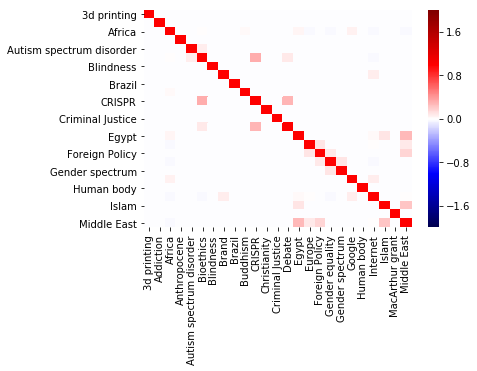

In [35]:
tag_heat = tag_df.copy() 
tag_heat['views'] = data['views']
sns.heatmap(tag_heat.iloc[:,0:25].corr(), cmap = 'seismic', vmin=-2, vmax=2)

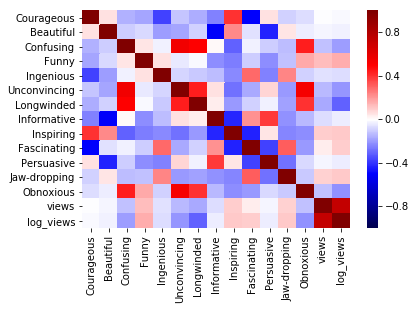

In [36]:
emote_heat = emote_df.copy()
emote_heat['views'] = data['views']
emote_heat['log_views'] = data['log_views']
sns.heatmap(emote_heat.corr(), cmap='seismic', vmin = -1, vmax=1)


In [37]:
tag_df = inter_df.join(tag_df)


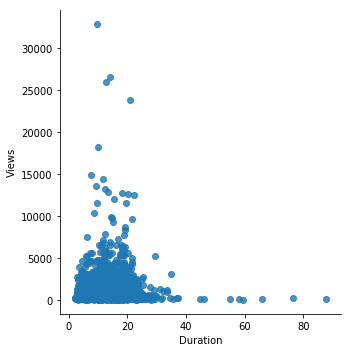

In [38]:
fig = sns.lmplot(y="views_pd", x="duration", data=tag_df, fit_reg = False)
fig = fig.set_axis_labels('Duration', 'Views')

In [39]:
tag_df.columns

Index(['comments', 'duration', 'event', 'film_date', 'languages',
       'main_speaker', 'published_date', 'tags', 'title', 'views',
       ...
       'weather', 'wikipedia', 'wind energy', 'women', 'women in business',
       'work-life balance', 'world cultures', 'writing', 'wunderkind',
       'youth'],
      dtype='object', length=388)

In [40]:
len(['days_online','languages','Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', 'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious',\
          'children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching', 'alternative energy', 'climate change', 'environment', 'global issues', 'science', 'sustainability', 'technology', 'computers', 'entertainment', 'interface design', 'media', 'music', 'performance', 'simplicity',\
           'software', 'MacArthur grant', 'activism', 'business', 'cities', 'green', 'inequality', 'politics', 'pollution', 'Africa', 'Google', 'economics', 'global development', 'health', 'statistics', 'visualizations', 'goal-setting', 'motivation', 'potential', 'psychology',\
           'Christianity', 'atheism', 'comedy', 'humor', 'religion', 'storytelling', 'architecture', 'collaboration', 'design', 'library', 'TED Brain Trust', 'brain', 'cognitive science', 'consciousness', 'evolution', 'philosophy','happiness',\
           'leadership', 'philanthropy', 'disaster relief', 'invention', 'open-source', 'TED Prize', 'movies', 'peace', 'social change', 'disease', 'ebola', 'entrepreneur', 'violin', 'wunderkind', 'youth', 'piano', 'engineering', 'industrial design', 'biology', 'nature', 'product design', 'science and art', 'wikipedia',\
           'community', 'communication', 'gender', 'relationships', 'theater', 'women', 'cosmos', 'physics', 'universe', 'astronomy', 'narcotics', 'choice', 'consumerism', 'marketing', 'decision-making', 'personal growth', 'cancer', 'aging', 'biotech', 'future', 'health care', 'investment', 'microfinance', 'poverty', 'telecom', 'transportation', 'corruption', 'military', 'policy',\
           'aircraft', 'flight', 'rocket science', 'exploration', 'sports', 'travel', 'photography', 'medicine', 'genetics', 'faith', 'illusion', 'robots', 'history', 'success', 'poetry', 'obesity', 'anthropology', 'language', 'complexity',\
           'evolutionary psychology', 'urban planning', 'innovation', 'United States', 'interview', 'performance art', 'materials', 'work-life balance', 'biodiversity', 'ecology', 'insects', 'animals', 'primates', 'typography', 'live music', 'singer', 'Brazil', 'animation', 'biomimicry', 'oceans', 'intelligence', 'biomechanics', 'online video', 'guitar', 'vocals', 'cello', 'china', 'memory', 'spoken word', 'composing', 'natural disaster',\
           'energy', 'museums', 'water', 'microsoft', 'virtual reality', 'women in business', 'Buddhism', 'New York', 'death', 'terrorism', 'Planets', 'adventure', 'mining', 'space', 'Bioethics', 'gaming', 'literature', 'prosthetics', 'books', 'sociology', 'violence', 'human origins', 'humanity', 'paleontology', 'asteroid', 'solar system', 'drones', 'solar energy', 'illness', 'depression', 'mental health', 'suicide', 'String theory', 'magic',\
           'compassion', 'empathy', 'writing', 'South America', 'world cultures', 'infrastructure', 'ancient world', 'garden', 'plants', 'telescopes', 'heart health', 'public health', 'big bang', 'bacteria', 'microbiology', 'submarine', 'society', 'archaeology', 'dinosaurs','beauty',\
           'plastic', 'Vaccines', 'conducting', 'family', 'trees', 'astrobiology', 'extraterrestrial life', 'introvert', 'personality', 'origami', 'dark matter', 'identity', 'nanoscale', 'geology', 'morality', 'presentation', 'crime',\
           'prison', 'democracy', 'smell', 'charter for compassion', 'social media', 'Senses', 'fashion', 'curiosity', 'programming', 'chemistry', 'shopping', 'body language', 'virus', 'birds', 'wind energy', 'extreme sports', 'prediction','productivity',\
           'TED Fellows', 'Natural resources', 'agriculture', 'india', 'neuroscience', 'money', 'state-building', 'Anthropocene', 'Europe', 'sight', 'Internet', 'government', 'advertising', 'sanitation', 'weather',\
           'big problems', 'rivers', 'Slavery', 'sexual violence', 'trafficking', 'Egypt', 'novel', 'feminism', 'TEDMED', 'Autism spectrum disorder', 'botany', 'mission blue', 'friendship','student',\
           'nuclear weapons', 'Surveillance', 'Islam', 'monkeys', 'Middle East', 'sound', 'population', 'manufacturing', 'TEDYouth', 'Gender equality', 'bullying', 'trust', 'sleep','journalism',\
           'cyborg', 'Foreign Policy', 'Surgery', 'medical research', 'protests', 'deextinction', 'disability',\
           'exoskeleton', 'nuclear energy', 'driverless cars', 'crowdsourcing', 'Brand', 'speech', 'failure', 'security', 'Blindness', 'Gender spectrum', 'glacier', 'mobility','TED en Español', 'public spaces',\
           'Human body', 'nonviolence', 'pharmaceuticals', 'molecular biology', 'behavioral economics', 'medical imaging', 'physiology', 'pregnancy', 'synthetic biology',\
           'hearing', 'Nobel prize', 'finance', 'algorithm', '3d printing', 'conservation', 'immigration', 'Criminal Justice','TED-Ed',\
           'privacy', 'microbes', 'machine learning', 'skateboarding', 'augmented reality', 'forensics', 'painting', 'pandemic',\
           'meditation', 'mindfulness', 'Syria', 'Transgender', 'testing', 'Debate', 'farming', 'cloud', 'TED Books', 'television','street art',\
           'Addiction', 'CRISPR', 'vulnerability', 'capitalism', 'refugees', 'grammar', 'resources', 'discovery', 'blockchain','TEDNYC','urban','TED Residency','biosphere'])

378

In [41]:
tag_df.loc[four_highest,['main_speaker','views',  'views_pd', 'duration']].sort_values('views', ascending=False)

,main_speaker,views,views_pd,duration
0,Ken Robinson,47227110,11502.0,19.40
1346,Amy Cuddy,43155405,23751.0,21.03
677,Simon Sinek,34309432,12717.0,18.07
837,Brené Brown,31168150,12644.0,20.32
452,Mary Roach,22270883,7307.0,16.72
1776,Julian Treasure,21594632,18254.0,9.97
201,Jill Bolte Taylor,21190883,6086.0,18.32


In [42]:
y = tag_df.log_views
X = tag_df.drop(['event', 'film_date', 'main_speaker', 'meditation', 'published_date', 'tags', 'title', 'views', 'views_pd', 'views_norm', 'log_views'],1)
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_views   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     12.41
Date:                Sun, 22 Apr 2018   Prob (F-statistic):          1.23e-321
Time:                        07:15:27   Log-Likelihood:                -1315.5
No. Observations:                2287   AIC:                             3385.
Df Residuals:                    1910   BIC:                             5547.
Df Model:                         376                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
comments                     0.0007   4.41e-05     16.992      0.000       0.001       0.001
duration                     0.0198      0.002      8.934      0.000       0.015       0.024
languages                    0.0426      0.002     27.635      0.000       0.040       0.046
days_online                 -0.0002   1.64e-05    -12.625      0.000      -0.000      -0.000
Courageous                  11.9166      0.217     54.890      0.000      11.491      12.342
Beautiful                   11.8833      0.185     64.192      0.000      11.520      12.246
Confusing                   14.8020      0.784     18.888      0.000      13.265      16.339
Funny                       13.8479      0.171     80.880      0.000      13.512      14.184
Ingenious                   11.4084      0.207     55.205      0.000      11.003      11.814
Unconvincing                11.7711      0.351     33.578      0.000      11.084      12.459
Longwinded                  10.2860      0.529     19.451      0.000       9.249      11.323
Informative                 12.6877      0.152     83.530      0.000      12.390      12.986
Inspiring                   13.2576      0.150     88.225      0.000      12.963      13.552
Fascinating                 13.5144      0.239     56.603      0.000      13.046      13.983
Persuasive                  12.0053      0.222     54.029      0.000      11.569      12.441
Jaw-dropping                14.9983      0.247     60.738      0.000      14.514      15.483
Obnoxious                   10.5487      0.570     18.508      0.000       9.431      11.666
3d printing                 -0.1449      0.324     -0.447      0.655      -0.780       0.491
Addiction                    0.3053      0.420      0.727      0.467      -0.518       1.128
Africa                      -0.0339      0.061     -0.559      0.576      -0.153       0.085
Anthropocene                -0.0408      0.171     -0.238      0.812      -0.377       0.295
Autism spectrum disorder    -0.1214      0.184     -0.659      0.510      -0.483       0.240
Bioethics                   -0.1000      0.135     -0.739      0.460      -0.365       0.165
Blindness                   -0.3226      0.188     -1.713      0.087      -0.692       0.047
Brand                       -0.0943      0.325     -0.290      0.772      -0.731       0.543
Brazil                       0.0740      0.174      0.424      0.671      -0.268       0.416
Buddhism                     0.1973      0.206      0.960      0.337      -0.206       0.600
CRISPR                       0.3001      0.425      0.705      0.481      -0.534       1.134
Christianity                 0.4144      0.270      1.536      0.125      -0.115       0.943
Criminal Justice             0.2631      0.250      1.051      0.293      -0.228       0.754
Debate        

In [43]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import cross_val_score

sig_cols = []
pvals = []

pvals = f_regression(X,y)



In [44]:
y.mean()

13.990645206713012

In [45]:
est = LinearRegression()
mean_sc = 0
for i in range(2,40):
    X_new = SelectKBest(f_regression, k = i).fit_transform(X,y)
    scores = cross_val_score(est, X_new , y, cv=10, scoring='neg_mean_squared_error')

    delta_sc = np.mean(-scores) - mean_sc
    #if delta_sc <0:
     #   print(i,np.mean(-scores))
     #   break  
    #else:
     #   mean_sc = np.mean(-scores)
    print(i,np.mean(-scores))
        

# 11 features is the right amount


2 0.3978660148296214
3 0.3826001056205123
4 0.37586082369688334
5 0.3697899882560504
6 0.3674606947416974
7 0.3654237475995493
8 0.3576205085488913
9 0.3436876155785664
10 0.34240762825874704
11 0.34056247892769037
12 0.3401609877424834
13 0.3380003743052247
14 0.3361319366409505
15 0.3328413262089451
16 0.3324344404550911
17 0.33087836118358566
18 0.3307325659945904
19 0.3270471651218446
20 0.30891766012407545
21 0.30744126246016135
22 0.30827505562983315
23 0.3056603778453487
24 0.3051105878535814
25 0.3051013452109089
26 0.30511764702232197
27 0.3054295098016263
28 0.3068258184009276
29 0.3063351560776602
30 0.3064204803067258
31 0.30695681122796176
32 0.30704354215842605
33 0.3066565506381385
34 0.30593969077356353
35 0.3057389630636051
36 0.3058053963980564
37 0.3061138307337322
38 0.30532440029367647
39 0.3054440225200139


In [46]:
model1 = smf.OLS(y, X).fit()

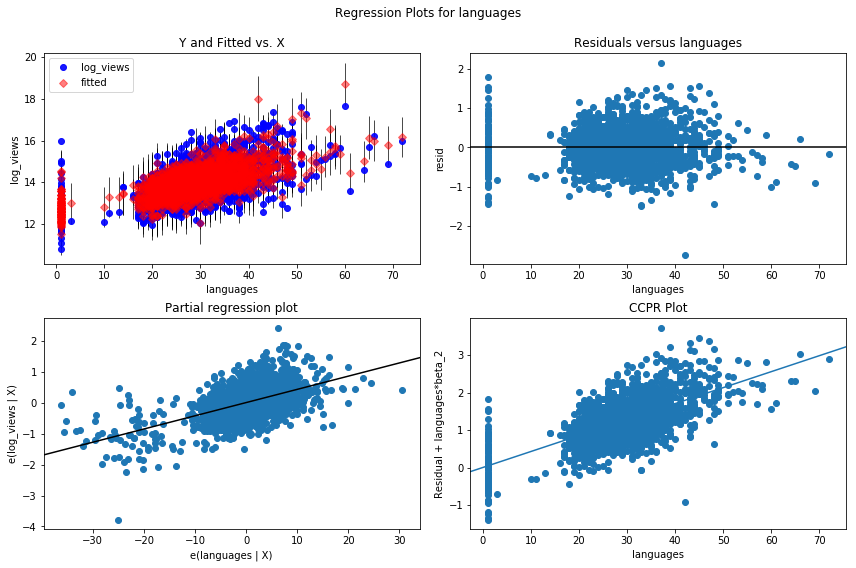

In [47]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model1, "languages", fig=fig)

## Transcripts of Presentations

Below is an analysis over the transcripts to see if any insight can be found.

In [53]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
transcripts = pd.read_csv('transcripts.csv')
colors = sns.diverging_palette(10, 220, sep=80, n=7)


In [54]:
transcripts['wc'] = transcripts['transcript'].apply(lambda x: len(x.split(' ')))
transcripts['wpm'] = (transcripts['wc']/data['duration']).replace(0,1)
test_trans = transcripts.copy()
transcripts = transcripts.dropna()

test_trans['wpm'] = test_trans['wc']/test_df['duration']


In [55]:
test_trans.dropna(inplace = True)

In [56]:
url_list = []
url_list = test_trans.url

In [57]:
#Writing a pickle file
import pickle

with open('url_list.pkl', 'wb') as picklefile:
    pickle.dump(url_list, picklefile)

In [50]:
ran = len(transcripts.transcript)

In [51]:
transcripts['positivity_index'] = ['' for i in range(len(transcripts['transcript']))]
transcripts['polarity_score'] = ['' for i in range(len(transcripts['transcript']))]
for i in range(0,ran):
    text = transcripts['transcript'][i]
    pos = TextBlob(text)
    pos_val = pos.sentiment.polarity
    transcripts.loc[i,'polarity_score'] = pos_val
    if pos_val > 0:
        transcripts.loc[i,'positivity_index'] = 'positive'
    else:
        transcripts.loc[i,'positivity_index'] = 'negative'
    


In [52]:
pos = TextBlob(text)
pos.sentiment.polarity

0.11102247275560158

In [53]:
trans_df = data.join(transcripts)
transcripts_df = tag_df.join(transcripts)


In [54]:
transcripts_df.wpm.min()
transcripts_df[transcripts_df['positivity_index'] == 'positive'].count()

comments             2249
duration             2249
event                2249
film_date            2249
languages            2249
main_speaker         2249
published_date       2249
tags                 2249
title                2249
views                2249
days_online          2249
views_pd             2249
log_views            2249
views_norm           2249
Courageous           2249
Beautiful            2249
Confusing            2249
Funny                2249
Ingenious            2249
Unconvincing         2249
Longwinded           2249
Informative          2249
Inspiring            2249
Fascinating          2249
Persuasive           2249
Jaw-dropping         2249
Obnoxious            2249
3d printing          2249
Addiction            2249
Africa               2249
                     ... 
trees                2249
trust                2249
typography           2249
universe             2249
urban                2249
urban planning       2249
violence             2249
violin      

In [55]:
sns.heatmap(transcripts_df(['Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', 'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious', 'log_views']).corr(), cmap=colors, annot = True)

TypeError: 'DataFrame' object is not callable

In [ ]:
(transcripts_df.loc[:,['Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', 'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious',]].sum())/len(transcripts_df.positivity_index)*100

In [ ]:
['Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', 'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping']

In [ ]:
fig = sns.pairplot(transcripts_df, vars=['Courageous', 'Beautiful', 'Confusing', 'Funny', 'Ingenious', 'Unconvincing', 'Longwinded', 'Informative', 'Inspiring', 'Fascinating', 'Persuasive', 'Jaw-dropping','Obnoxious', 'log_views'], hue = 'positivity_index')


In [ ]:
fig = sns.lmplot(y="Informative", x="wpm", data=transcripts_df, hue = 'positivity_index',  fit_reg = False)
